<a href="https://colab.research.google.com/github/mayooueidat-uva/DS1002-S24/blob/main/Copy_of_12_CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Capital Asset Pricing Model (CAPM)

### Assignment due Monday 22 April at noon

---

### Objectives

This assignment is primarily meant to refresh your numpy and pandas skills.  
Technical objectives are discussed below.  

- All the usual rules apply:  you may work together (groups of at most 3), make sure all names are easy to find at the top of the submission, submit the link to your working colab notebook


### Background

In finance, CAPM is a single-factor regression model used for analyzing (and predicting) excess stock returns. There are better, more accurate models, but it has its uses. For example, the *market beta* is a useful output which has something to do with the risk of particular investments.

1.  Read [this brief synopsis](https://en.wikipedia.org/wiki/Capital_asset_pricing_model) of CAPM.


Don't worry if you don't understand all the terminology.
Look for a moment at the main formula (in the "Formula" section).  For us that formula will look like this:

\begin{aligned}
E(R_A) = R_f + \beta_A (E(R_{SP}) - R_f)
\end{aligned}

Some notes on the symbols in this formula:
- The formula is used to estimate $E(R_A)$.  The $E$ here stands for the expected value, and $R_A$ is the rate of return of the investment $A$.
- To use this formula, you therefore need to know the values of the other variables.
- The variable $R_f$ is the "risk-free rate," which is the amount of return you can get on an investment that has zero risk, like say a bank account.
This quantity changes over time but for our purposes we can treat it as a constant.  It is hard-coded into the code below.  Make sure you see where this variable occurs in the formula above.
- In this assignment the variable $R_{SP}$ is a measure of the rate of return of the overall market.  (The $E$ on the right side also means expected value.)
- The variable $\beta_A$ measures something about the relative risk of the investment A, relative to the overall market.  The technical objective of this assignment will be to compute $\beta_A$ below, and then to examine how sensitive it is to the specific data.
- The value you get for $\beta_A$ will be a number.  If it is greater than 1, it means (*very roughly*) that the investment A is more volatile than the overall market.  If it is less than 1, it means that the investment is less volatile than the overall market.  But **do not take this too seriously!** In particular see all the caveats at the wikipedia page.
- The A investment in our example is an individual stock (Apple).



In [5]:
# CAPM notes - wikipedia
# theoretically appropriate required rate of return of an asset
# reward-to-risk ratio. that's derived from the slope of our line.
# wow i didn't understand that wikipedia article
# from what i AM able to gather, it's an equation used to calculate just how much
# of [x] type of money you need to remain financially safe.
# apparently it's a FAILURE of a model, empirically

2.  Load the packages and data.  (Note that the following code chunk also hard-codes the constant $R_f$.)  
The data lives in the file `capm_market_data` in the `data` folder on the `GitHub` site.

In [6]:
# load numpy and pandas packages
import numpy as np
import pandas as pd

# get data
from google.colab import drive
drive.mount('/content/drive')
url = 'https://docs.google.com/spreadsheets/d/1Zh2hH0MXLEnlb2wLkcn0d5aQK_B0wS8_m6gxaTTjCRA/export?format=csv'
capm_market_data = pd.read_csv(url)

# risk-free Treasury rate
R_f = 0.0175 / 252

Mounted at /content/drive


3.  Look at some records.  
SPY is something that mirrors the S&P 500 ("the market").  
AAPL is the code for Apple stock.  
The values are closing prices, adjusted for splits and dividends.

In [7]:
# imma just look at the data sheet
capm_market_data

,date,spy_adj_close,aapl_adj_close
0,2020-01-02,321.555786,298.829956
1,2020-01-03,319.120911,295.924713
2,2020-01-06,320.338379,298.282715
3,2020-01-07,319.437653,296.879883
4,2020-01-08,321.140106,301.655548
...,...,...,...
130,2020-07-09,314.380005,383.010010
131,2020-07-10,317.589996,383.679993
132,2020-07-13,314.839996,381.910004
133,2020-07-14,318.920013,388.230011


4.  Drop the date column

In [8]:
capm_market_dateless = capm_market_data.drop(["date"], axis = 1)
capm_market_dateless
# i see why we CAN drop the dates. because we don't need
# to see them.

,spy_adj_close,aapl_adj_close
0,321.555786,298.829956
1,319.120911,295.924713
2,320.338379,298.282715
3,319.437653,296.879883
4,321.140106,301.655548
...,...,...
130,314.380005,383.010010
131,317.589996,383.679993
132,314.839996,381.910004
133,318.920013,388.230011


5.  Compute daily returns (percentage changes in price) for both SPY and AAPL.
(Be sure to drop the first row of NaN.)  
Hint: pandas has functions to easily do this.  
Print the first 5 rows of returns.


In [9]:
# compute daily returns...it's one of those 'daily' functions innit.
capm_market_dateless['spy_daily_returns'] = capm_market_dateless['spy_adj_close'].pct_change()
capm_market_dateless['aapl_daily_returns'] = capm_market_dateless['aapl_adj_close'].pct_change()
capm_market_dateless = capm_market_dateless.dropna()
capm_market_dateless.head()

,spy_adj_close,aapl_adj_close,spy_daily_returns,aapl_daily_returns
1,319.120911,295.924713,-0.007572,-0.009722
2,320.338379,298.282715,0.003815,0.007968
3,319.437653,296.879883,-0.002812,-0.004703
4,321.140106,301.655548,0.005330,0.016086
5,323.317627,308.062988,0.006781,0.021241


6.  Save the SPY and AAPL returns into separate numpy arrays.  
Print the first five values from each of the two arrays.


In [10]:
# SPY daily returns DATAFRAME. D. A. T. A. F. R. A. M. E.
spy_returns_pd = capm_market_dateless.drop(["spy_adj_close", "aapl_adj_close", "aapl_daily_returns"], axis = 1)
spy_returns_pd.head()

,spy_daily_returns
1,-0.007572
2,0.003815
3,-0.002812
4,0.005330
5,0.006781


In [11]:
# finally! a numpy array for SPY returns
spy_returns_numpy = spy_returns_pd.to_numpy()
spy_returns_numpy = spy_returns_numpy.flatten()
# printing our five.
print(spy_returns_numpy[:5])

# why did i choose to print a dataframe first?
# i wanted to guarantee that the values printed in my array
# matched the values in my original dataset without
# having to scroll up so much.

[-0.00757217  0.00381507 -0.0028118   0.00532953  0.00678059]


In [12]:
# i can do precisely the same thing with the aapl daily returns
aapl_returns_pd = capm_market_dateless.drop(["spy_adj_close", "aapl_adj_close", "spy_daily_returns"], axis = 1)
aapl_returns_pd.head()

,aapl_daily_returns
1,-0.009722
2,0.007968
3,-0.004703
4,0.016086
5,0.021241


In [13]:
# AAPL daily returns, finally as a numpy array!
aapl_returns_numpy = aapl_returns_pd.to_numpy()
aapl_returns_numpy = aapl_returns_numpy.flatten()
# printing our five.
print(aapl_returns_numpy[:5])

[-0.00972206  0.00796825 -0.00470303  0.01608619  0.02124092]


7.  Make arrays (one for SPY, one for AAPL) containing the *excess* returns by subtracting the constant $R_f$ from the returns.  
(Recall that $R_f$ is the "risk-free rate" meaning essentially that you could earn this much in interest if you didn't invest in anything.)  
Print the LAST five excess returns from both SPY and AAPL numpy arrays.

In [14]:
# excess returns for SPY - dataframe
spy_returns_pd['spy_excess_returns'] = spy_returns_pd['spy_daily_returns'] - (R_f)
spy_returnsexcess = spy_returns_pd.drop(["spy_daily_returns"], axis = 1)
spy_returnsexcess.tail()
# i recommend you go back over this notebook and guarantee your math is correct.

,spy_excess_returns
130,-0.005762
131,0.010141
132,-0.008728
133,0.012890
134,0.009118


In [15]:
# excess returns for SPY - numpy array
spy_returnsexcess_numpy = spy_returnsexcess.to_numpy()
spy_returnsexcess_numpy = spy_returnsexcess_numpy.flatten()
# printing our five
print(spy_returnsexcess_numpy[-5:])

[-0.00576237  0.0101411  -0.00872841  0.01288957  0.00911779]


In [16]:
# excess returns for AAPL - dataframe
aapl_returns_pd['aapl_excess_returns'] = aapl_returns_pd['aapl_daily_returns'] - (R_f)
aapl_returnsexcess = aapl_returns_pd.drop(["aapl_daily_returns"], axis = 1)
aapl_returnsexcess.tail()
# i recommend you go back over this notebook and guarantee your math is correct.

,aapl_excess_returns
130,0.004231
131,0.001680
132,-0.004683
133,0.016479
134,0.006808


In [17]:
# excess return for AAPL - numpy array
aapl_returnsexcess_numpy = aapl_returnsexcess.to_numpy()
aapl_returnsexcess_numpy = aapl_returnsexcess_numpy.flatten()
# printing our five
print(aapl_returnsexcess_numpy[-5:])

[ 0.00423088  0.00167981 -0.00468264  0.01647898  0.00680788]


8. Make a scatterplot with SPY excess returns on the $x$-axis and AAPL excess returns on the $y$-axis.  
If you need it, here is the [Matplotlib documentation]( https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

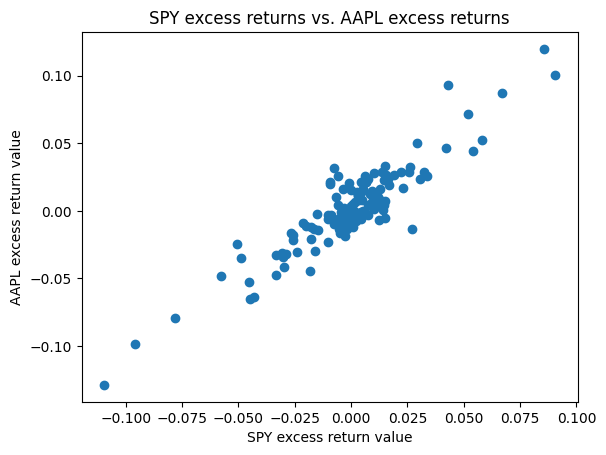

In [18]:
import matplotlib.pyplot as plt

x = spy_returnsexcess_numpy
y = aapl_returnsexcess_numpy
plt.title("SPY excess returns vs. AAPL excess returns")
plt.xlabel('SPY excess return value')
plt.ylabel('AAPL excess return value')
plt.scatter(x, y)

The value of $\beta_A$ is computed from the arrays you built in problem 7, via a formula that uses some statistical functions called the "variance" and the "covariance."

Any individual 1-d array of numbers has a variance, which you can compute using `numpy`'s function `var()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.var.html)).  This is a number.

If you have two 1-d arrays of the same length, they collectively have something called a covariance which `numpy` also can compute using `cov()` (documented [here](https://numpy.org/doc/stable/reference/generated/numpy.cov.html)).

The covariance is also a number, but look at what happens when you send two 1-d arrays to `cov()`: it returns a $2\times 2$ matrix.  (Try it!)  The covariance we are looking for is the number that lives in both the top right and the bottom left of this matrix.  (Those two numbers should be the same.)  The top left and bottom right entries of the covariance matrix also have meaning, but we don't need them.



9. Use `numpy` functions as described above to compute the estimate of $\beta_A$, using the following formula:  
\begin{aligned} \beta_A= \frac{ \text{cov}(A,SP) }{ \text{var}(SP) } \end{aligned}
In our context, A will be the 1-d array you made in problem 7 for AAPL, and SP will be the 1-d array you made for SPY.

In [19]:
# finding the beta estimate
B_a = ((np.cov(aapl_returnsexcess_numpy, spy_returnsexcess_numpy))/(np.var(spy_returnsexcess_numpy)))
print(B_a)

# WHOAAAAAAA our beta estimate is 1.09561727.

[[1.41911326 1.09561727]
 [1.09561727 1.0075188 ]]


You should have found that the beta estimate is greater than one.  
This means that the volatility of AAPL stock, given the data, and according to this particular (flawed) model,
is higher than the volatility of the S&P 500.

Bonus:  Is this something you can see on the plot you made?



Yes, that seems fairly accurate - the excess return value of SPY and the excess return value of the AAPL stock are positively correlated with one another. As far as I can tell, 'excess return' is a reasonable measure of the volatility of a stock (It's a measure of greater-than-expected return on one's investment). In theory, a 100% stable stock would yield zero excess return.


*   *The greater the excess return on AAPL = the greater the volatility of AAPL*
*   *The greater the excess return on SPY = the greater the volatility of SPY*
* *According to the scatterplot: the greater the excess return on SPY, the greater the excess return on AAPL.*

Therefore, the greater the volatility of SPY, the greater the volatility of AAPL.




Finally, let's look at how sensitive the beta is to each data point.   
We want to drop each data point (one at a time), compute \\(\hat\beta_i\\) using our formula from above, and save each measurement.

This is called *jackknifing*.



10. Write a function called `beta_sensitivity()` with these specs:

- take numpy arrays `x` and `y` as inputs
- outputs a list of tuples, so that each tuple contains (observation row dropped, beta estimate)

Hint: **np.delete(x, i).reshape(-1,1)** will delete observation i from array x, and make it a column vector

In [302]:
def beta_sensitivity(x, y, z):
  for i in range(z):
    a =  np.delete(x,i).reshape(-1,1).flatten()
    b =  np.delete(y,i).reshape(-1,1).flatten()
    c = ((np.cov(b, a))/(np.var(a))).flatten()
    print((i, c[1]))

11. Call `beta_sensitivity()` on the arrays A and SP from earlier and print the first ten tuples of output.

In [303]:
beta_sensitivity(spy_returnsexcess_numpy, aapl_returnsexcess_numpy, 10)

(0, 1.095384550714696)
(1, 1.0956189841356772)
(2, 1.0955558563179262)
(3, 1.0952630305566213)
(4, 1.0949054770449493)
(5, 1.095788863002989)
(6, 1.0948925467917112)
(7, 1.0954060139216644)
(8, 1.0958504740310844)
(9, 1.0955676650361494)
